In [1]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import datetime 
import holidays
from statsmodels.tsa.stattools import pacf
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from prophet import Prophet
import statsmodels.api as sm 
from sklearn.metrics import mean_absolute_percentage_error



# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


In [3]:
data_east = pd.read_csv('univar_data/east_daily.csv')
data_east

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,7
1133,2023-03-21,14
1134,2023-03-22,266


In [4]:
#Creating east stationary dataset 

# Calculate the differenced series
data_east_stationary = data_east['daily_deaths'] - data_east['daily_deaths'].shift(1)

# Create a new DataFrame with the differenced series
data_east_stationary = pd.DataFrame(data_east_stationary, columns=['daily_deaths'])

# Drop the 'date' column if it exists
if 'date' in data_east_stationary.columns:
    data_east_stationary = data_east_stationary.drop(columns=['date'])

# Drop any rows with missing values (NaN) resulting from differencing
data_east_stationary = data_east_stationary.dropna()

data_east_stationary

,daily_deaths
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
1131,0.0
1132,7.0
1133,7.0
1134,252.0


In [5]:
data_midwest = pd.read_csv('univar_data/midwest_daily.csv')
data_midwest 

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,23
1133,2023-03-21,131
1134,2023-03-22,40


In [6]:
data_midwest_stationary = pd.read_csv('univar_data/midwest_stationary.csv')
data_midwest_stationary 

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,23
1132,108
1133,-91


In [7]:
data_west = pd.read_csv('univar_data/west_daily.csv')
data_west

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,37
1133,2023-03-21,33
1134,2023-03-22,184


In [8]:
data_west_stationary = pd.read_csv('univar_data/west_stationary.csv')
data_west_stationary

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,37
1132,-4
1133,151


In [9]:
data_south = pd.read_csv('univar_data/south_daily.csv')
data_south 

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,71
1133,2023-03-21,31
1134,2023-03-22,240


In [10]:
data_south_stationary = pd.read_csv('univar_data/south_stationary.csv')
data_south_stationary 

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,71
1132,-40
1133,209


# Stationary Analysis

In [11]:
X = data_east.daily_deaths
result = adfuller(X)
print('East ADF Statistic: %f' % result[0])
print('East p-value: %f' % result[1])
print('East Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_midwest_stationary.daily_deaths
result = adfuller(X)
print('Midwest ADF Statistic: %f' % result[0])
print('Midwest p-value: %f' % result[1])
print('Midwest Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_south_stationary.daily_deaths
result = adfuller(X)
print('South ADF Statistic: %f' % result[0])
print('South p-value: %f' % result[1])  
print('South Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_west_stationary.daily_deaths
result = adfuller(X)
print('West ADF Statistic: %f' % result[0])
print('West p-value: %f' % result[1])
print('West Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

East ADF Statistic: -3.842138
East p-value: 0.002504
East Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Midwest ADF Statistic: -6.609058
Midwest p-value: 0.000000
Midwest Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
South ADF Statistic: -6.154608
South p-value: 0.000000
South Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
West ADF Statistic: -5.689075
West p-value: 0.000001
West Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


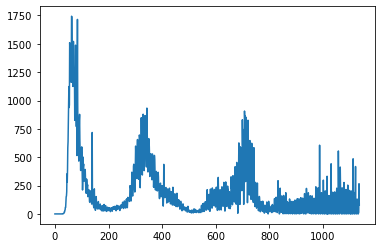

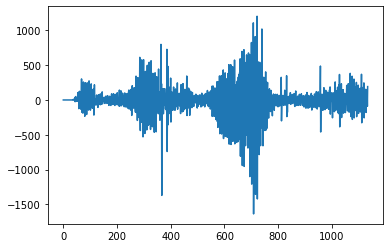

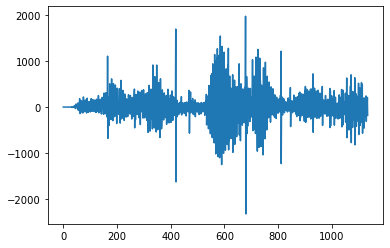

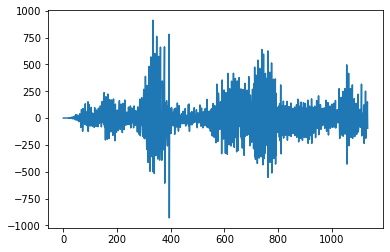

In [12]:
data_east['daily_deaths'].plot()
plt.show()

data_midwest_stationary['daily_deaths'].plot()
plt.show()

data_south_stationary['daily_deaths'].plot()
plt.show()

data_west_stationary['daily_deaths'].plot()
plt.show()

# Prophet - Univariate 

# defining MASE

In [13]:
def MASE(Actual, Predicted):
    n = len(Actual)
    
    mae = mean_absolute_error(Actual, Predicted)

    # Calculate the denominator
    denominator = 1 / (n - 1) * np.sum(np.abs(Predicted[1:] - Actual[:-1]))

    # Avoid division by zero or small denominators
    if denominator > 1e-6:
        mase = mae / denominator
    else:
        mase = np.inf

    return mase

# EAST

13:28:13 - cmdstanpy - INFO - Chain [1] start processing
13:28:13 - cmdstanpy - INFO - Chain [1] done processing


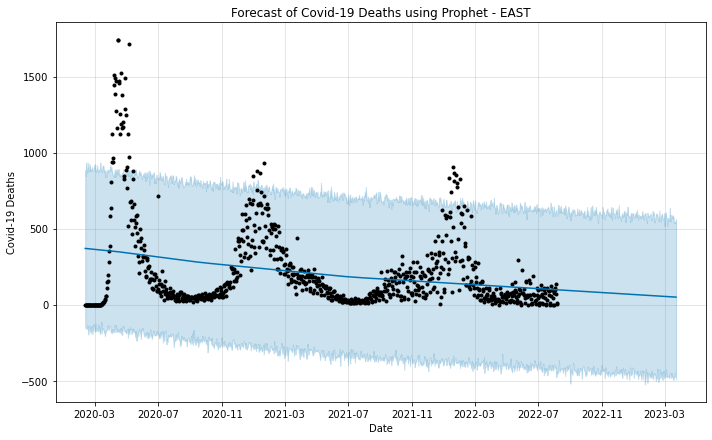

In [14]:
#EAST

# Split the data into training and testing sets
train_size = int(len(data_east) * 0.8)  # 80% train, 20% test
train_data, test_data = data_east.iloc[:train_size], data_east.iloc[train_size:]

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.04,
    seasonality_prior_scale=7.0,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the training data
model.fit(train_data.reset_index().rename(columns={'date': 'ds', 'daily_deaths': 'y'}))

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=len(test_data))  # Forecast for the length of the test data

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet - EAST')
plt.show()


In [15]:
# Convert 'ds' column in actual data to datetime
train_data['ds'] = pd.to_datetime(train_data['date'])
test_data['ds'] = pd.to_datetime(test_data['date'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column for training set
train_merged_data = pd.concat([train_data.set_index('ds'), forecast.set_index('ds').loc[train_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for training set
train_mse = mean_squared_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_mae = mean_absolute_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_rmse = np.sqrt(train_mse)
train_mase = MASE(train_merged_data['daily_deaths'], train_merged_data['yhat'])


# Print the performance metrics for training set
print("Training Set Performance Metrics:")
print("Training Set Mean Absolute Error (MAE):", train_mae)
print("Training Set Root Mean Squared Error (RMSE):", train_rmse)
print("Training Set MASE", train_mase)

# Concatenate actual data and forecasted values based on 'ds' column for testing set
test_merged_data = pd.concat([test_data.set_index('ds'), forecast.set_index('ds').loc[test_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for testing set
test_mse = mean_squared_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_mae = mean_absolute_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_rmse = np.sqrt(test_mse)
test_mase = MASE(test_merged_data['daily_deaths'], test_merged_data['yhat'])

# Print the performance metrics for testing set
print("\nTesting Set Performance Metrics:")
print("Testing Set Mean Absolute Error (MAE):", test_mae)
print("Testing Set Root Mean Squared Error (RMSE):", test_rmse)
print("Test Set MASE", test_mase)

Training Set Performance Metrics:
Training Set Mean Absolute Error (MAE): 180.9460702578467
Training Set Root Mean Squared Error (RMSE): 266.1784307707063
Training Set MASE 1.0017398276559677

Testing Set Performance Metrics:
Testing Set Mean Absolute Error (MAE): 74.12364931478749
Testing Set Root Mean Squared Error (RMSE): 104.00318106623926
Test Set MASE 1.0003440092324074


BETTER MODEL

13:30:09 - cmdstanpy - INFO - Chain [1] start processing
13:30:10 - cmdstanpy - INFO - Chain [1] done processing


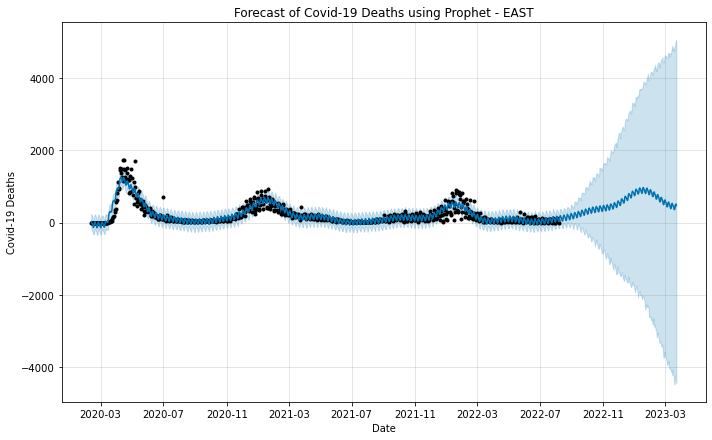

In [34]:
#EAST

# Split the data into training and testing sets
train_size = int(len(data_east) * 0.8)  # 80% train, 20% test
train_data, test_data = data_east.iloc[:train_size], data_east.iloc[train_size:]


# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=4,
    weekly_seasonality=True,
    changepoint_prior_scale=0.4,
    seasonality_prior_scale=7.0,
    interval_width=0.95
)

# Fit the model to the training data
model.fit(train_data.reset_index().rename(columns={'date': 'ds', 'daily_deaths': 'y'}))

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=len(test_data))  # Forecast for the length of the test data

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet - EAST')
plt.show()

In [35]:
# Convert 'ds' column in actual data to datetime
train_data['ds'] = pd.to_datetime(train_data['date'])
test_data['ds'] = pd.to_datetime(test_data['date'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column for training set
train_merged_data = pd.concat([train_data.set_index('ds'), forecast.set_index('ds').loc[train_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for training set
train_mse = mean_squared_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_mae = mean_absolute_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_rmse = np.sqrt(train_mse)
train_mase = MASE(train_merged_data['daily_deaths'], train_merged_data['yhat'])


# Print the performance metrics for training set
print("Training Set Performance Metrics:")
print("Training Set Mean Absolute Error (MAE):", train_mae)
print("Training Set Root Mean Squared Error (RMSE):", train_rmse)
print("Training Set MASE", train_mase)

# Concatenate actual data and forecasted values based on 'ds' column for testing set
test_merged_data = pd.concat([test_data.set_index('ds'), forecast.set_index('ds').loc[test_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for testing set
test_mse = mean_squared_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_mae = mean_absolute_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_rmse = np.sqrt(test_mse)
test_mase = MASE(test_merged_data['daily_deaths'], test_merged_data['yhat'])

# Print the performance metrics for testing set
print("\nTesting Set Performance Metrics:")
print("Testing Set Mean Absolute Error (MAE):", test_mae)
print("Testing Set Root Mean Squared Error (RMSE):", test_rmse)
print("Test Set MASE", test_mase)

Training Set Performance Metrics:
Training Set Mean Absolute Error (MAE): 64.69179296238532
Training Set Root Mean Squared Error (RMSE): 101.63234172544581
Training Set MASE 0.9998342266189804

Testing Set Performance Metrics:
Testing Set Mean Absolute Error (MAE): 417.88634262435266
Testing Set Root Mean Squared Error (RMSE): 479.68255891961593
Test Set MASE 0.9997428219049638


# MIDWEST

12:33:16 - cmdstanpy - INFO - Chain [1] start processing
12:33:16 - cmdstanpy - INFO - Chain [1] done processing


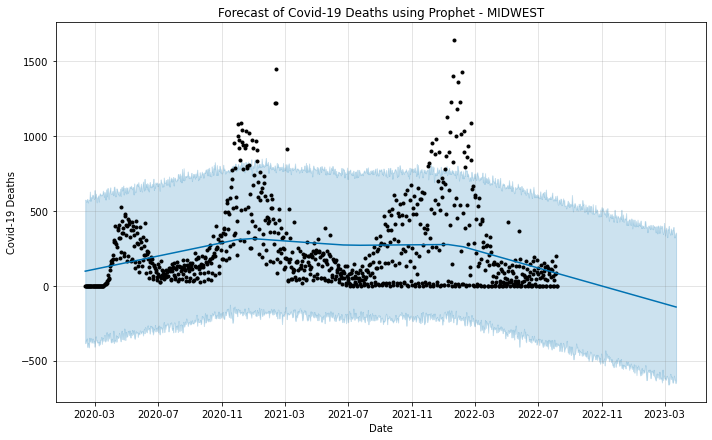

In [356]:
#MIDWEST

# Split the data into training and testing sets
train_size = int(len(data_midwest) * 0.8)  # 80% train, 20% test
train_data, test_data = data_midwest.iloc[:train_size], data_midwest.iloc[train_size:]

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.04,
    seasonality_prior_scale=7.0,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the training data
model.fit(train_data.reset_index().rename(columns={'date': 'ds', 'daily_deaths': 'y'}))

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=len(test_data))  # Forecast for the length of the test data

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet - MIDWEST')
plt.show()

In [357]:
# Convert 'ds' column in actual data to datetime
train_data['ds'] = pd.to_datetime(train_data['date'])
test_data['ds'] = pd.to_datetime(test_data['date'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column for training set
train_merged_data = pd.concat([train_data.set_index('ds'), forecast.set_index('ds').loc[train_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for training set
train_mse = mean_squared_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_mae = mean_absolute_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_rmse = np.sqrt(train_mse)
train_mase = MASE(train_merged_data['daily_deaths'], train_merged_data['yhat'])


# Print the performance metrics for training set
print("Training Set Performance Metrics:")
print("Training Set Mean Absolute Error (MAE):", train_mae)
print("Training Set Root Mean Squared Error (RMSE):", train_rmse)
print("Training Set MASE", train_mase)

# Concatenate actual data and forecasted values based on 'ds' column for testing set
test_merged_data = pd.concat([test_data.set_index('ds'), forecast.set_index('ds').loc[test_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for testing set
test_mse = mean_squared_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_mae = mean_absolute_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_rmse = np.sqrt(test_mse)
test_mase = MASE(test_merged_data['daily_deaths'], test_merged_data['yhat'])

# Print the performance metrics for testing set
print("\nTesting Set Performance Metrics:")
print("Testing Set Mean Absolute Error (MAE):", test_mae)
print("Testing Set Root Mean Squared Error (RMSE):", test_rmse)
print("Test Set MASE", test_mase)


Training Set Performance Metrics:
Training Set Mean Absolute Error (MAE): 183.14744019753206
Training Set Root Mean Squared Error (RMSE): 249.67360389738974
Training Set MASE 0.9999854225466623

Testing Set Performance Metrics:
Testing Set Mean Absolute Error (MAE): 128.69448901015562
Testing Set Root Mean Squared Error (RMSE): 168.30851613251716
Test Set MASE 1.0092954672877232


BETTER MODEL

13:30:39 - cmdstanpy - INFO - Chain [1] start processing
13:30:39 - cmdstanpy - INFO - Chain [1] done processing


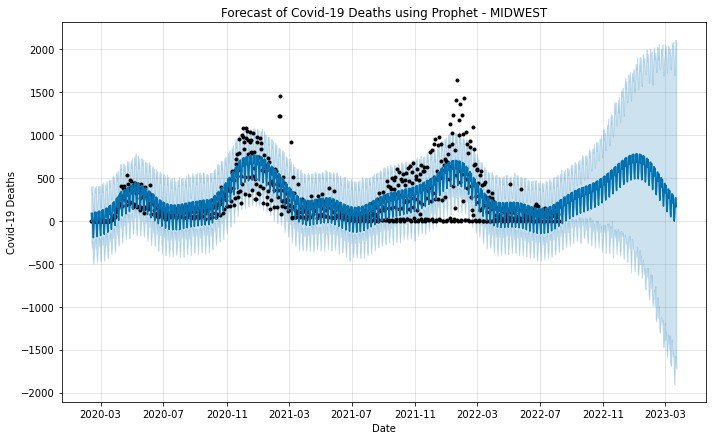

In [38]:
#MIDWEST

# Split the data into training and testing sets
train_size = int(len(data_midwest) * 0.8)  # 80% train, 20% test
train_data, test_data = data_midwest.iloc[:train_size], data_midwest.iloc[train_size:]


# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=4,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.9,
    seasonality_prior_scale=6.0,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the training data
model.fit(train_data.reset_index().rename(columns={'date': 'ds', 'daily_deaths': 'y'}))

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=len(test_data))  # Forecast for the length of the test data

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet - MIDWEST')
plt.show()

In [39]:
# Convert 'ds' column in actual data to datetime
train_data['ds'] = pd.to_datetime(train_data['date'])
test_data['ds'] = pd.to_datetime(test_data['date'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column for training set
train_merged_data = pd.concat([train_data.set_index('ds'), forecast.set_index('ds').loc[train_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for training set
train_mse = mean_squared_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_mae = mean_absolute_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_rmse = np.sqrt(train_mse)
train_mase = MASE(train_merged_data['daily_deaths'], train_merged_data['yhat'])


# Print the performance metrics for training set
print("Training Set Performance Metrics:")
print("Training Set Mean Absolute Error (MAE):", train_mae)
print("Training Set Root Mean Squared Error (RMSE):", train_rmse)
print("Training Set MASE", train_mase)

# Concatenate actual data and forecasted values based on 'ds' column for testing set
test_merged_data = pd.concat([test_data.set_index('ds'), forecast.set_index('ds').loc[test_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for testing set
test_mse = mean_squared_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_mae = mean_absolute_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_rmse = np.sqrt(test_mse)
test_mase = MASE(test_merged_data['daily_deaths'], test_merged_data['yhat'])

# Print the performance metrics for testing set
print("\nTesting Set Performance Metrics:")
print("Testing Set Mean Absolute Error (MAE):", test_mae)
print("Testing Set Root Mean Squared Error (RMSE):", test_rmse)
print("Test Set MASE", test_mase)


Training Set Performance Metrics:
Training Set Mean Absolute Error (MAE): 110.56234344487765
Training Set Root Mean Squared Error (RMSE): 158.48014634727346
Training Set MASE 1.000389751571015

Testing Set Performance Metrics:
Testing Set Mean Absolute Error (MAE): 326.20147079850085
Testing Set Root Mean Squared Error (RMSE): 375.2246490146289
Test Set MASE 0.9966339886345187


# SOUTH

12:33:19 - cmdstanpy - INFO - Chain [1] start processing
12:33:19 - cmdstanpy - INFO - Chain [1] done processing


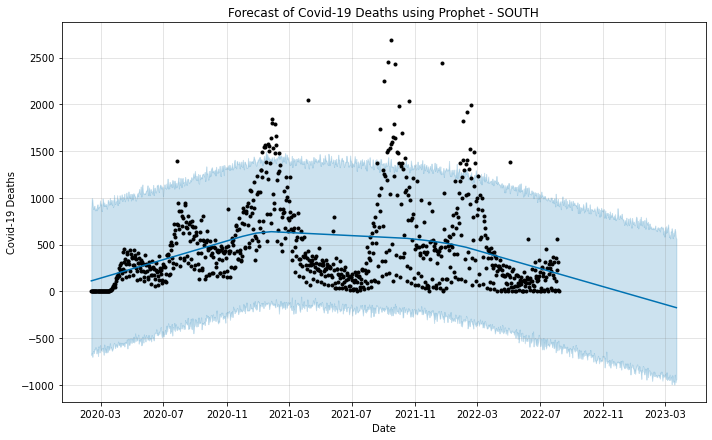

In [360]:
# SOUTH

train_size = int(len(data_south) * 0.8)  # 80% train, 20% test
train_data, test_data = data_south.iloc[:train_size], data_south.iloc[train_size:]

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.04,
    seasonality_prior_scale=7.0,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the training data
model.fit(train_data.reset_index().rename(columns={'date': 'ds', 'daily_deaths': 'y'}))

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=len(test_data))  # Forecast for the length of the test data

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet - SOUTH')
plt.show()


In [361]:
# Convert 'ds' column in actual data to datetime
train_data['ds'] = pd.to_datetime(train_data['date'])
test_data['ds'] = pd.to_datetime(test_data['date'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column for training set
train_merged_data = pd.concat([train_data.set_index('ds'), forecast.set_index('ds').loc[train_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for training set
train_mse = mean_squared_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_mae = mean_absolute_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_rmse = np.sqrt(train_mse)
train_mase = MASE(train_merged_data['daily_deaths'], train_merged_data['yhat'])


# Print the performance metrics for training set
print("Training Set Performance Metrics:")
print("Training Set Mean Absolute Error (MAE):", train_mae)
print("Training Set Root Mean Squared Error (RMSE):", train_rmse)
print("Training Set MASE", train_mase)

# Concatenate actual data and forecasted values based on 'ds' column for testing set
test_merged_data = pd.concat([test_data.set_index('ds'), forecast.set_index('ds').loc[test_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for testing set
test_mse = mean_squared_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_mae = mean_absolute_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_rmse = np.sqrt(test_mse)
test_mase = MASE(test_merged_data['daily_deaths'], test_merged_data['yhat'])

# Print the performance metrics for testing set
print("\nTesting Set Performance Metrics:")
print("Testing Set Mean Absolute Error (MAE):", test_mae)
print("Testing Set Root Mean Squared Error (RMSE):", test_rmse)
print("Test Set MASE", test_mase)


Training Set Performance Metrics:
Training Set Mean Absolute Error (MAE): 289.7725638304506
Training Set Root Mean Squared Error (RMSE): 399.95397759230843
Training Set MASE 1.0000295177352825

Testing Set Performance Metrics:
Testing Set Mean Absolute Error (MAE): 179.0504458079392
Testing Set Root Mean Squared Error (RMSE): 251.3796540666026
Test Set MASE 1.0063859614542552


BETTER MODEL

13:35:21 - cmdstanpy - INFO - Chain [1] start processing
13:35:21 - cmdstanpy - INFO - Chain [1] done processing


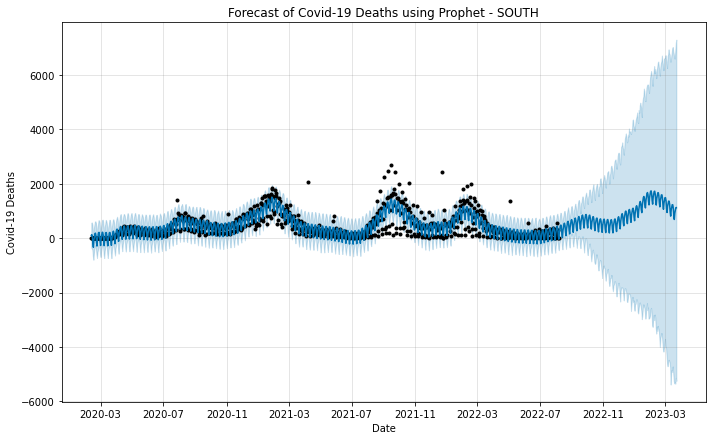

In [56]:
# SOUTH

train_size = int(len(data_south) * 0.8)  # 80% train, 20% test
train_data, test_data = data_south.iloc[:train_size], data_south.iloc[train_size:]

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_prior_scale=7.0,
    changepoint_prior_scale=1.9,
    interval_width=0.95
)

# Fit the model to the training data
model.fit(train_data.reset_index().rename(columns={'date': 'ds', 'daily_deaths': 'y'}))

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=len(test_data))  # Forecast for the length of the test data

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet - SOUTH')
plt.show()


In [57]:
# Convert 'ds' column in actual data to datetime
train_data['ds'] = pd.to_datetime(train_data['date'])
test_data['ds'] = pd.to_datetime(test_data['date'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column for training set
train_merged_data = pd.concat([train_data.set_index('ds'), forecast.set_index('ds').loc[train_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for training set
train_mse = mean_squared_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_mae = mean_absolute_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_rmse = np.sqrt(train_mse)
train_mase = MASE(train_merged_data['daily_deaths'], train_merged_data['yhat'])


# Print the performance metrics for training set
print("Training Set Performance Metrics:")
print("Training Set Mean Absolute Error (MAE):", train_mae)
print("Training Set Root Mean Squared Error (RMSE):", train_rmse)
print("Training Set MASE", train_mase)

# Concatenate actual data and forecasted values based on 'ds' column for testing set
test_merged_data = pd.concat([test_data.set_index('ds'), forecast.set_index('ds').loc[test_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for testing set
test_mse = mean_squared_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_mae = mean_absolute_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_rmse = np.sqrt(test_mse)
test_mase = MASE(test_merged_data['daily_deaths'], test_merged_data['yhat'])

# Print the performance metrics for testing set
print("\nTesting Set Performance Metrics:")
print("Testing Set Mean Absolute Error (MAE):", test_mae)
print("Testing Set Root Mean Squared Error (RMSE):", test_rmse)
print("Test Set MASE", test_mase)

Training Set Performance Metrics:
Training Set Mean Absolute Error (MAE): 157.5258881506893
Training Set Root Mean Squared Error (RMSE): 231.37880685165737
Training Set MASE 0.9998869506873145

Testing Set Performance Metrics:
Testing Set Mean Absolute Error (MAE): 689.0840338550258
Testing Set Root Mean Squared Error (RMSE): 798.2959967156033
Test Set MASE 1.0035199513243496


# WEST

12:33:21 - cmdstanpy - INFO - Chain [1] start processing
12:33:21 - cmdstanpy - INFO - Chain [1] done processing


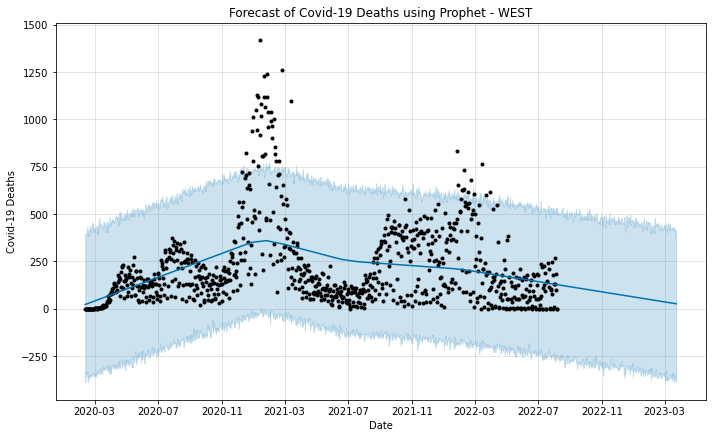

In [364]:
# WEST

train_size = int(len(data_south) * 0.8)  # 80% train, 20% test
train_data, test_data = data_west.iloc[:train_size], data_west.iloc[train_size:]

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.04,
    seasonality_prior_scale=7.0,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the training data
model.fit(train_data.reset_index().rename(columns={'date': 'ds', 'daily_deaths': 'y'}))

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=len(test_data))  # Forecast for the length of the test data

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet - WEST')
plt.show()


In [365]:
# Convert 'ds' column in actual data to datetime
train_data['ds'] = pd.to_datetime(train_data['date'])
test_data['ds'] = pd.to_datetime(test_data['date'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column for training set
train_merged_data = pd.concat([train_data.set_index('ds'), forecast.set_index('ds').loc[train_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for training set
train_mse = mean_squared_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_mae = mean_absolute_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_rmse = np.sqrt(train_mse)
train_mase = MASE(train_merged_data['daily_deaths'], train_merged_data['yhat'])


# Print the performance metrics for training set
print("Training Set Performance Metrics:")
print("Training Set Mean Absolute Error (MAE):", train_mae)
print("Training Set Root Mean Squared Error (RMSE):", train_rmse)
print("Training Set MASE", train_mase)

# Concatenate actual data and forecasted values based on 'ds' column for testing set
test_merged_data = pd.concat([test_data.set_index('ds'), forecast.set_index('ds').loc[test_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for testing set
test_mse = mean_squared_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_mae = mean_absolute_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_rmse = np.sqrt(test_mse)
test_mase = MASE(test_merged_data['daily_deaths'], test_merged_data['yhat'])

# Print the performance metrics for testing set
print("\nTesting Set Performance Metrics:")
print("Testing Set Mean Absolute Error (MAE):", test_mae)
print("Testing Set Root Mean Squared Error (RMSE):", test_rmse)
print("Test Set MASE", test_mase)


Training Set Performance Metrics:
Training Set Mean Absolute Error (MAE): 143.9316155945094
Training Set Root Mean Squared Error (RMSE): 197.1972782086886
Training Set MASE 1.000041974647652

Testing Set Performance Metrics:
Testing Set Mean Absolute Error (MAE): 71.1423853020632
Testing Set Root Mean Squared Error (RMSE): 98.16664152665298
Test Set MASE 1.0031660400117377


BEST MODEL

13:32:56 - cmdstanpy - INFO - Chain [1] start processing
13:33:01 - cmdstanpy - INFO - Chain [1] done processing


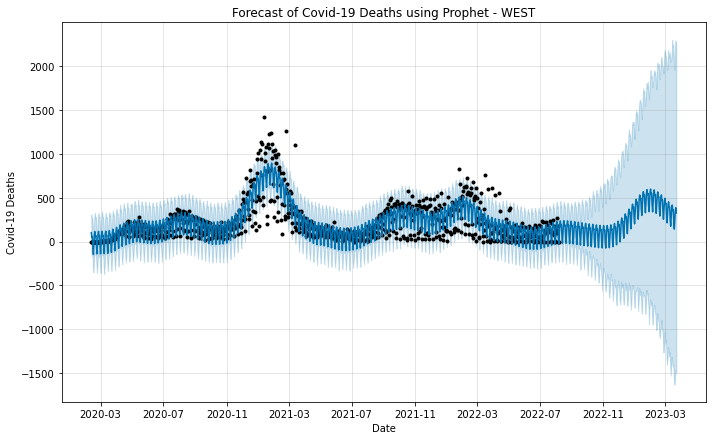

In [50]:
# WEST

train_size = int(len(data_south) * 0.8)  # 80% train, 20% test
train_data, test_data = data_west.iloc[:train_size], data_west.iloc[train_size:]

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=4,
    weekly_seasonality=True,
    seasonality_prior_scale=7.0,
    daily_seasonality=365,
    changepoint_prior_scale=0.9,
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the training data
model.fit(train_data.reset_index().rename(columns={'date': 'ds', 'daily_deaths': 'y'}))

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=len(test_data))  # Forecast for the length of the test data

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet - WEST')
plt.show()


In [51]:
# Convert 'ds' column in actual data to datetime
train_data['ds'] = pd.to_datetime(train_data['date'])
test_data['ds'] = pd.to_datetime(test_data['date'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column for training set
train_merged_data = pd.concat([train_data.set_index('ds'), forecast.set_index('ds').loc[train_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for training set
train_mse = mean_squared_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_mae = mean_absolute_error(train_merged_data['daily_deaths'], train_merged_data['yhat'])
train_rmse = np.sqrt(train_mse)
train_mase = MASE(train_merged_data['daily_deaths'], train_merged_data['yhat'])


# Print the performance metrics for training set
print("Training Set Performance Metrics:")
print("Training Set Mean Absolute Error (MAE):", train_mae)
print("Training Set Root Mean Squared Error (RMSE):", train_rmse)
print("Training Set MASE", train_mase)

# Concatenate actual data and forecasted values based on 'ds' column for testing set
test_merged_data = pd.concat([test_data.set_index('ds'), forecast.set_index('ds').loc[test_data['ds']]], axis=1, join='inner').reset_index()

# Calculate performance metrics for testing set
test_mse = mean_squared_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_mae = mean_absolute_error(test_merged_data['daily_deaths'], test_merged_data['yhat'])
test_rmse = np.sqrt(test_mse)
test_mase = MASE(test_merged_data['daily_deaths'], test_merged_data['yhat'])

# Print the performance metrics for testing set
print("\nTesting Set Performance Metrics:")
print("Testing Set Mean Absolute Error (MAE):", test_mae)
print("Testing Set Root Mean Squared Error (RMSE):", test_rmse)
print("Test Set MASE", test_mase)

Training Set Performance Metrics:
Training Set Mean Absolute Error (MAE): 76.56969564813727
Training Set Root Mean Squared Error (RMSE): 109.9853393081258
Training Set MASE 1.0006896994810894

Testing Set Performance Metrics:
Testing Set Mean Absolute Error (MAE): 168.1011830511976
Testing Set Root Mean Squared Error (RMSE): 224.8949964307615
Test Set MASE 1.0021698897766922
